   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 15.2 MB/s eta 0:00:00
19.847607361963192


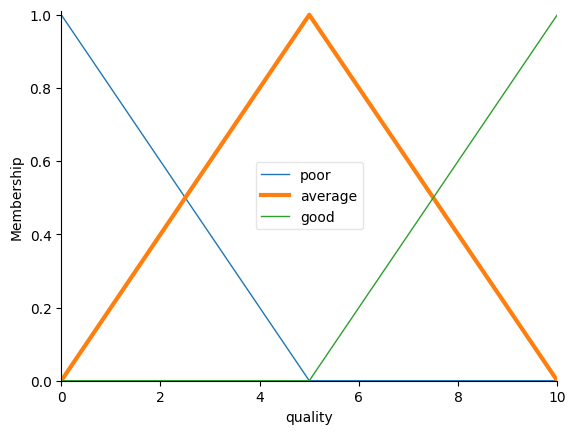

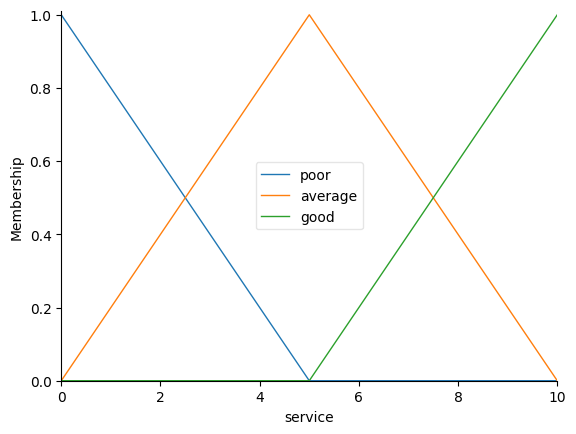

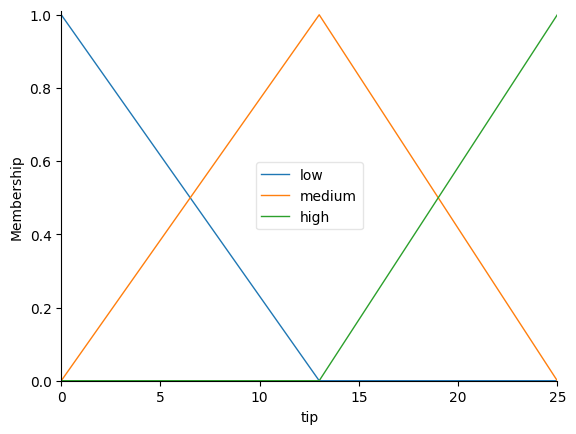

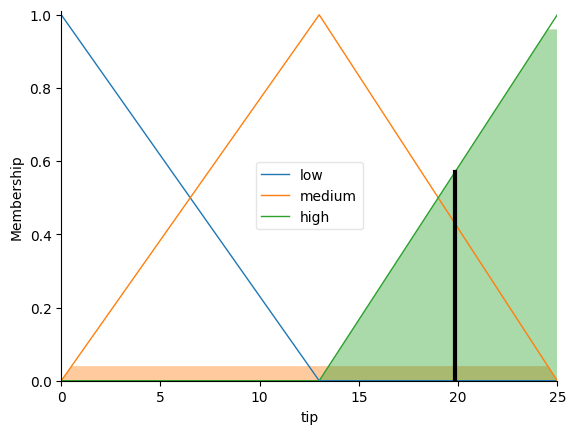

In [2]:
# Пример еды чаевых c Ctrl
# https://scikit-fuzzy.readthedocs.io/en/latest/auto_examples/plot_tipping_problem_newapi.html

!pip install -U scikit-fuzzy   # в первый запуск разкоментировать и нсталировать эту библиотеку
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Новые объекты Antecedent/Consequent содержат переменные универсума и функции членства
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# автоматическое заполнение членства  с помощью .automf(3, 5 или 7)
quality.automf(3)
service.automf(3)

# Пользовательские функции членства можно создавать интерактивно с помощью  Pythonic API
tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# Вы можете увидеть, как это выглядит с помощью .view()
quality['average'].view()
service.view()
tip.view()

rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

rule1.view

tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)
# Задание значений входных данных
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8
# Для передачи сразу многих вх. данных используйте .inputs(dict_of_data)

tipping.compute() # вычисление выхода нечеткой системы
print(tipping.output['tip'])

tip.view(sim=tipping)
